<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/Classification_Algorithms1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction:
In today's competitive business landscape, retaining customers is more crucial than ever. Companies often invest heavily in acquiring new customers, yet the cost of losing an existing customer can be even greater.

Understanding the factors that lead to customer churn—when a customer decides to stop using a service—is essential for creating effective retention strategies. Imagine having the power to predict which customers are at risk of leaving, enabling you to proactively address their needs and concerns before they decide to go.

<center><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" width=500/></center>

By analyzing a comprehensive dataset that includes customer demographics, account details, and the services they've subscribed to, you can uncover the underlying reasons for churn. This knowledge allows businesses to tailor their retention programs, offering personalized solutions that enhance customer satisfaction and loyalty, ultimately driving long-term growth and profitability. Let's harness the power of data to not only understand why customers leave but to keep them engaged and committed to your brand.

# Section 2: Import the necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Section 3: Loading the Data

Download the data [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

**Dataset Information:**

**Content:**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called `Churn`.
- ervices that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents.

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data
customer_churn_df = pd.read_csv('/content/drive/MyDrive/customer_churn_classification_data/telco_customer_churn.csv')

# Viewing the data
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Inspect the data
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Remove the column - 'customerID'
customer_churn_df  = customer_churn_df.drop(labels=['customerID'], axis=1)

In [ ]:
# Checking the data information
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Section 4: EDA
EDA is the process of analyzing and visualizing the dataset to uncover underlying patterns, trends, and relationships. It helps in understanding the data's structure and guiding the feature selection and modeling process.

## 4.1 Check the distribution of the target variable - `Churn`.


In [ ]:
# Check the distribution of the target variable
customer_churn_df['Churn'].value_counts(normalize=True)

""" There is a heavy imalance in the target variable, so this has to be normalized in order to prevent skewed model results. """

' There is a heavy imalance in the target variable, so this has to be normalized in order to prevent skewed model results. '

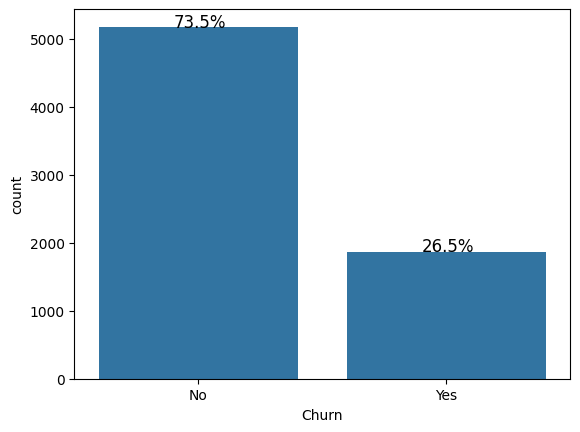

In [ ]:
# Create a countplot to check the distribution of the target variable
ax = sns.countplot(x='Churn', data=customer_churn_df)

# Get total number of data points
total = customer_churn_df.shape[0]

# Calculate and add percentage text above each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

## 4.2 Do an analysis of the churn rate wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [ ]:
### Analyze churn rate by categorical features
# Listing all the categorical columns
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

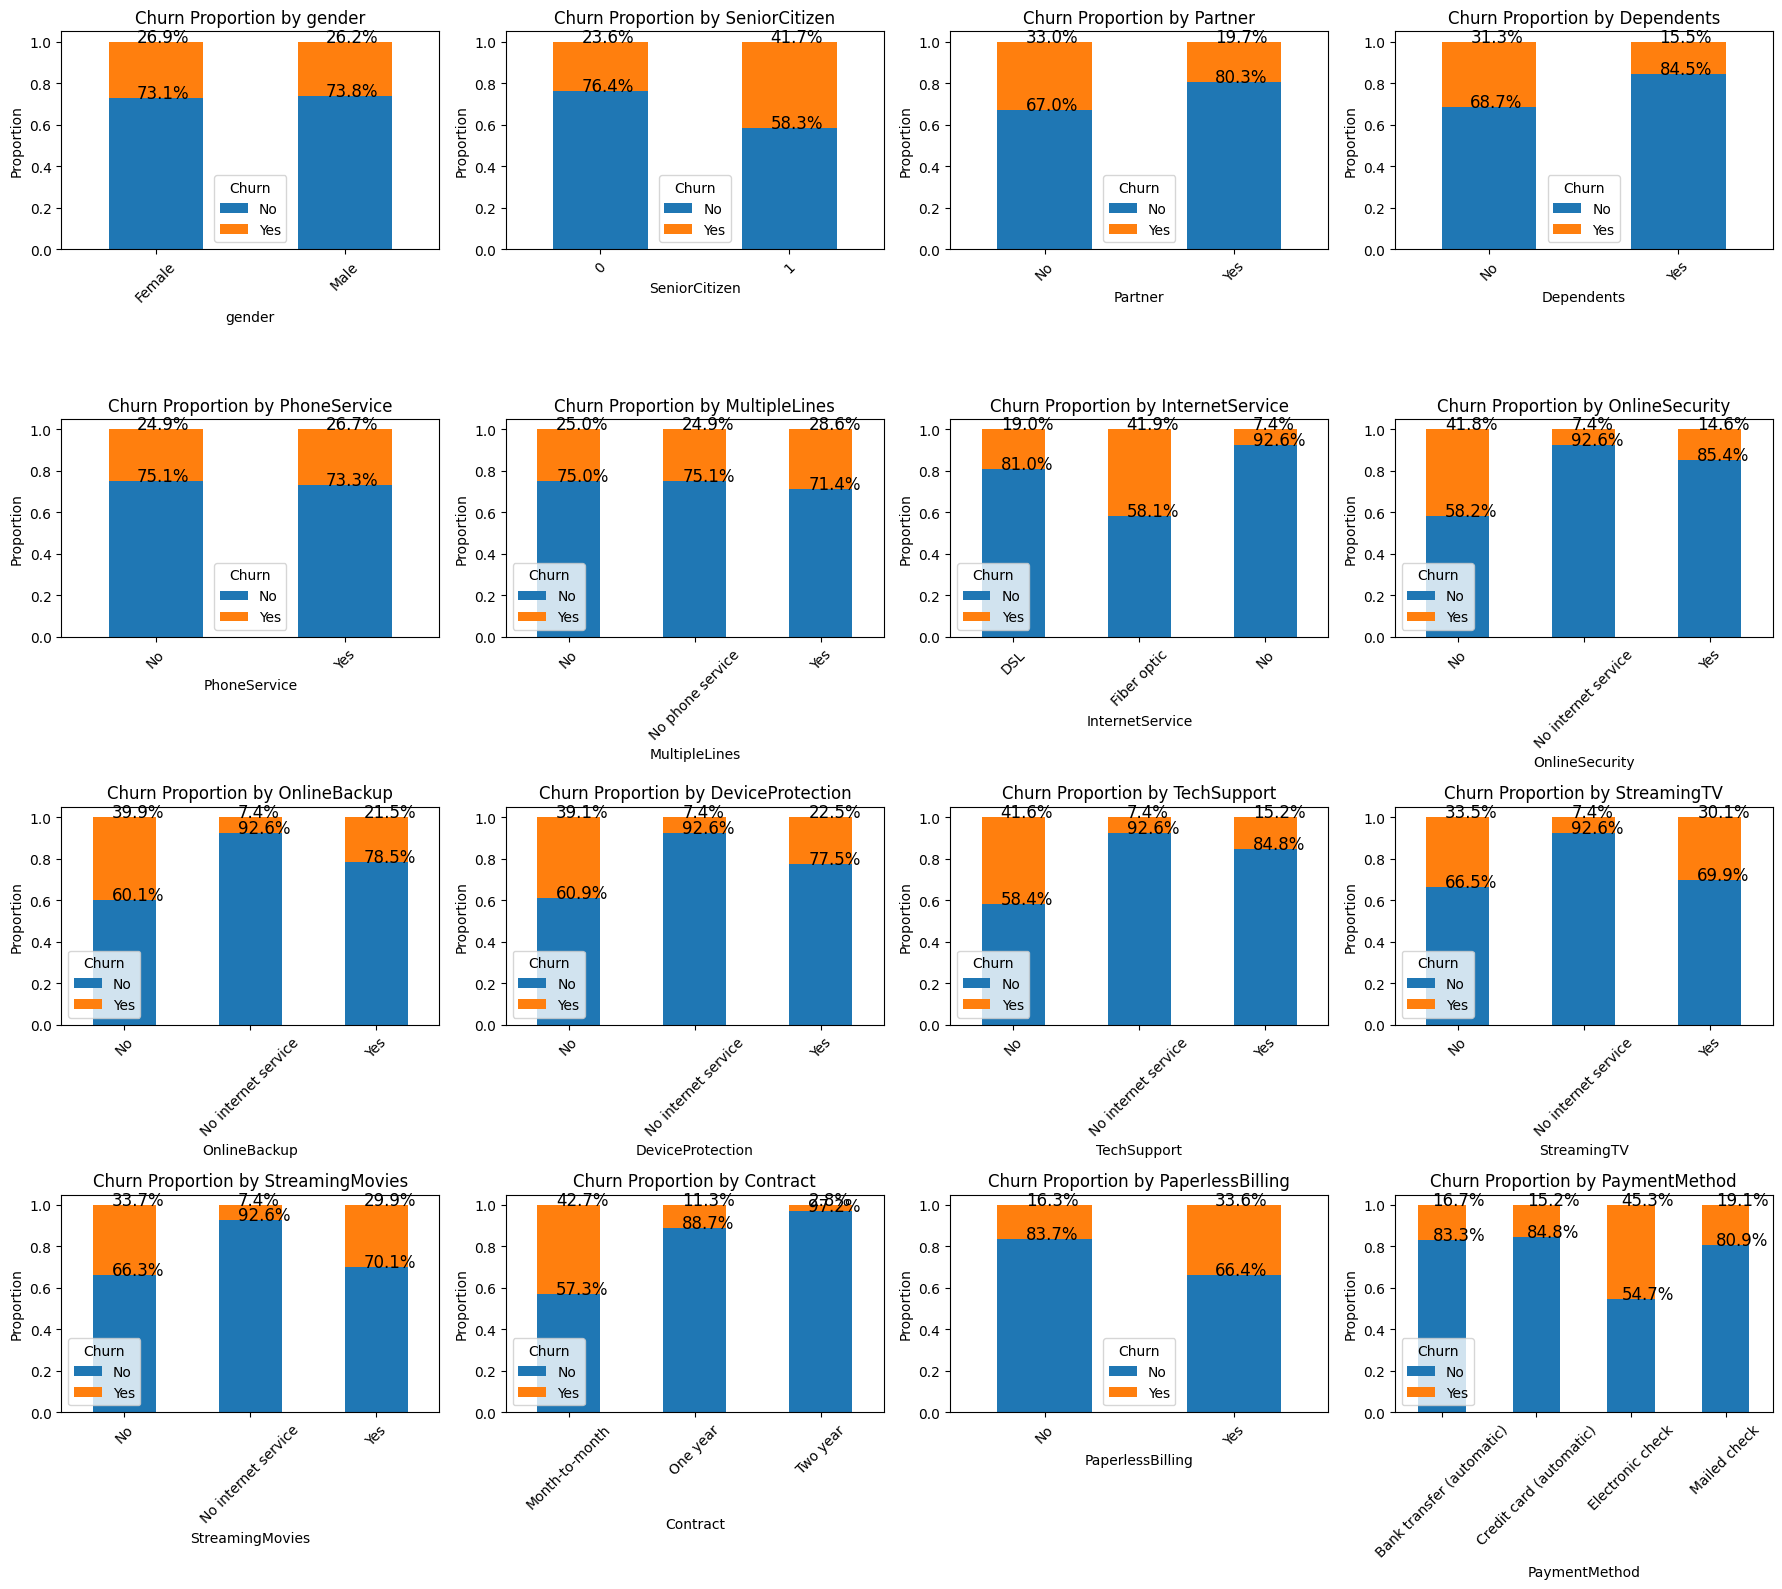

In [ ]:
### Visualize the data
# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

# Plot each categorical feature in a subplot
for i, column in enumerate(categorical_columns):
    # Calculate normalized proportions because of class imbalance
    normalized_counts = (
        customer_churn_df.groupby(column)['Churn']
        .value_counts(normalize=True)
        .unstack()
    )

    # Plotting the normalized counts as bar plots
    normalized_counts.plot(kind='bar', stacked=True, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Churn Proportion by {column}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

    # Get total number of data points
    category_total = normalized_counts.sum(axis=1).iloc[0] * customer_churn_df.shape[0] # Multiply by total rows to get actual count

    # Add churn percentages to the stacked attributes in the columns
    for p in axes[i].patches:
      percentage = '{:.1f}%'.format(100 * p.get_height() * customer_churn_df.shape[0]  / category_total)
      x = p.get_x() + p.get_width() / 2 - 0.1
      y = p.get_y() + p.get_height()
      axes[i].annotate(percentage, (x, y), size=12)


# Adjust layout
plt.tight_layout()
plt.show()


# Section 5: Feature Engineering

## 5.1 Convert `TotalCharges` column to numeric

In [ ]:
# Converting TotalCharges to numeric
customer_churn_df.TotalCharges = pd.to_numeric(customer_churn_df.TotalCharges, errors='coerce')

## 5.2 Handle the categorical features by converting them to dummies

In [ ]:
# One-hot encoding of the categorical features
one_hot_data = pd.get_dummies(customer_churn_df, columns=categorical_columns)
one_hot_data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,No,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,No,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,Yes,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


## 5.3 Encode the `Churn` column
- `Yes` as 1
- `No` as 0

In [ ]:
# Encode the 'Churn' column
one_hot_data.Churn = customer_churn_df.Churn.replace({'Yes': 1, 'No' : 0})

one_hot_data.Churn.head()

<ipython-input-277-3e87eb76ba47>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_data.Churn = customer_churn_df.Churn.replace({'Yes': 1, 'No' : 0})


,Churn
0,0
1,0
2,1
3,0
4,1


## 5.4 Do a correlation analysis of the dataset

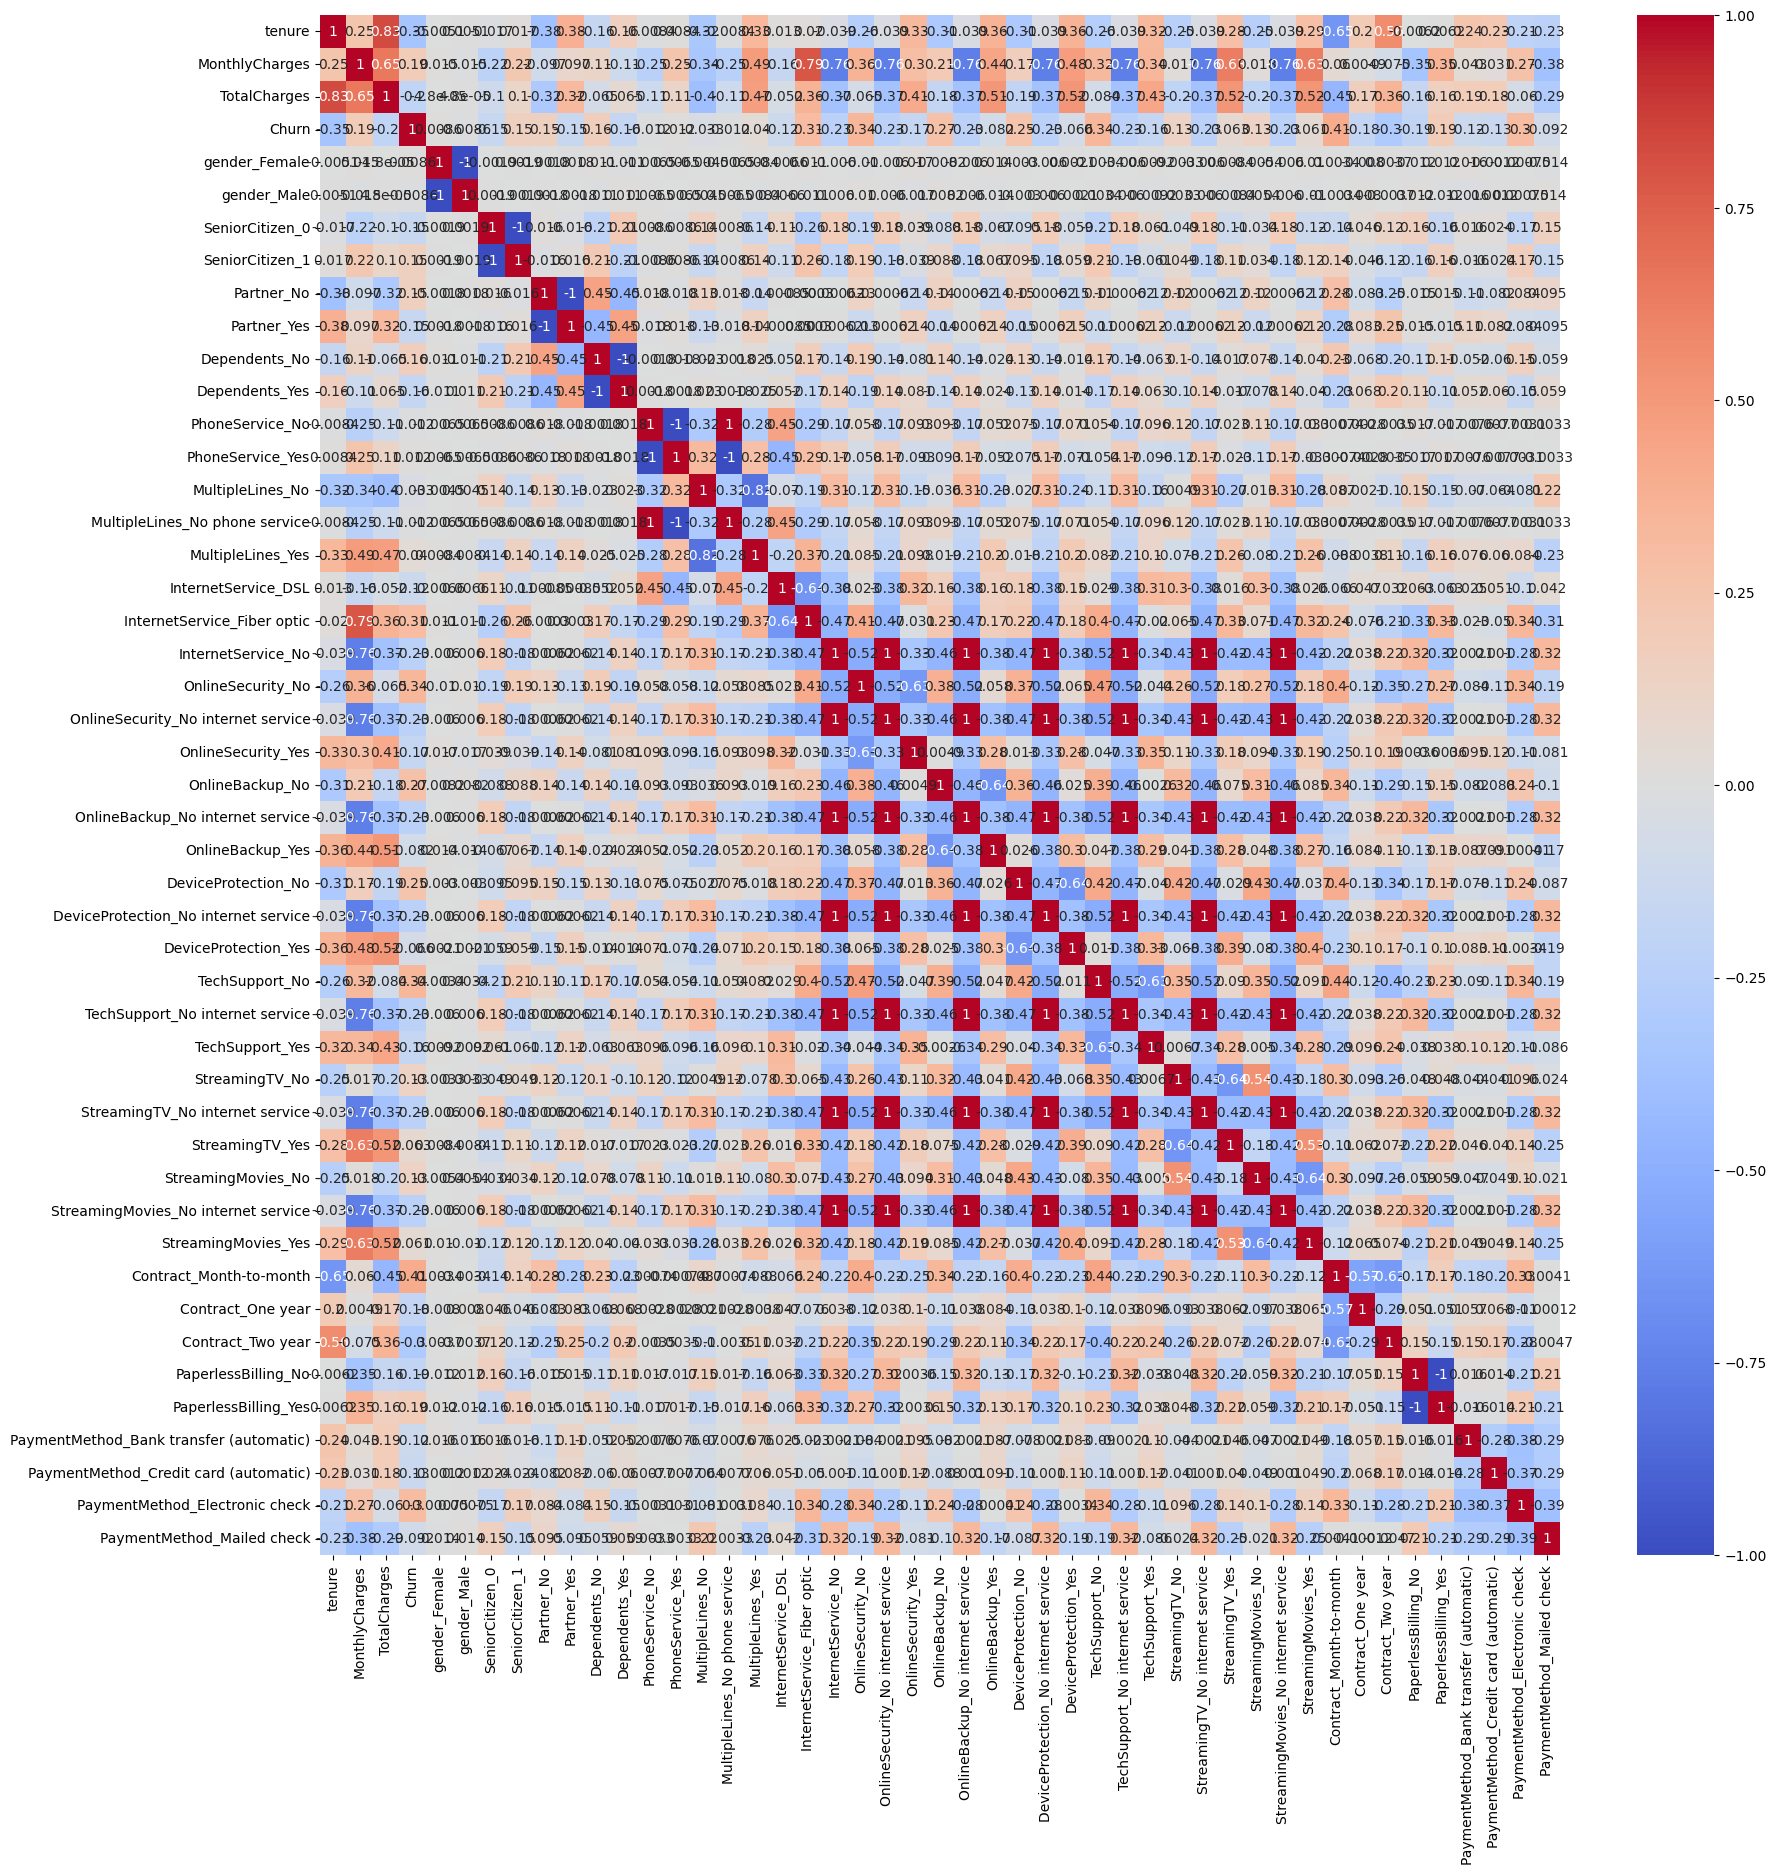

In [ ]:
# Create a heatmap displying the correlation coefficients of the variables
corr = one_hot_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## 5.5 Check for null values & handle them

In [ ]:
# Checking the null values
one_hot_data.isnull().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,11
Churn,0
gender_Female,0
gender_Male,0
SeniorCitizen_0,0
SeniorCitizen_1,0
Partner_No,0
Partner_Yes,0


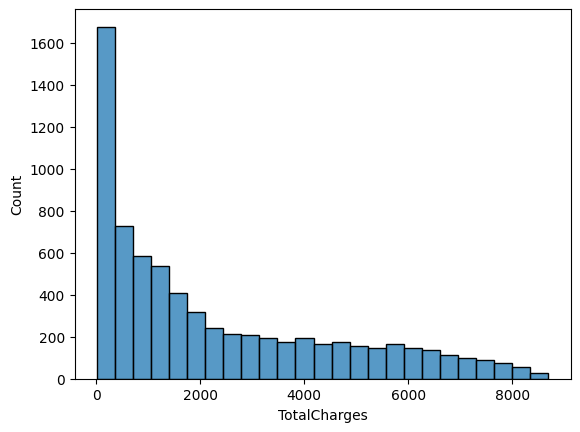

In [ ]:
# Check distribution of the total charges to make sure imputing teh missing values with the mean is the most appropriate choice
sns.histplot(one_hot_data.TotalCharges)
plt.show()

In [ ]:
### Imputing with the mean
"""Even though the instruction say we should impute with the median, per the heavily sckewed distribution above,
we will impute with the median instead as it would be a better measure of central tendency in this case.

Furthermore, it would have been technically more ordered to perform imputation before one-hot encoding, because for any null values,
the encoder will just put 0 for all instances of that encoded column.  Wo technically, the one-hot encoder would not catch null values
for categorical columns that were null since they with now technically have a value of 0 accross the board..."""

# Calculating the median as opposed the mean of the data
total_charges_median = one_hot_data.TotalCharges.median()

# Impute the median as opposed the mean of the data
one_hot_data.TotalCharges = one_hot_data.TotalCharges.fillna(total_charges_median)

# Check the data
one_hot_data.isnull().sum()

,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender_Female,0
gender_Male,0
SeniorCitizen_0,0
SeniorCitizen_1,0
Partner_No,0
Partner_Yes,0


# Section 6: Model Building

## 6.1 Split the data into train and test

In [ ]:
# Define a function to split the data
def split_data(df: pd.DataFrame, target: str, test_size: float):

    # Create 'X'
    predictors = df.drop(target, axis=1)

    # Create 'y'
    target = df[target]

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test


In [ ]:
# Call the function to split the data
X_train, X_test, y_train, y_test = split_data(one_hot_data, 'Churn', 0.2)

In [ ]:
# Check the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 46)
(1409, 46)
(5634,)
(1409,)


## 6.2 Scale the data

In [ ]:
# Create data scaler function

def scaler(X_train, X_test):

  # Importing the library
  from sklearn.preprocessing import StandardScaler

  # Perform scaling operation
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train, X_test


In [ ]:
# Call function
X_train, X_test = scaler(X_train, X_test)

In [ ]:
# Check data
print(X_train.shape)
print(X_test.shape)

(5634, 46)
(1409, 46)


## 6.3 Build the Logistic Regression Model & check the metrics

In [ ]:
# Building the logistic regression model

# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state = 42, max_iter=2000)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)




# Make predictions on the testing set
y_pred = logistic_model.predict(X_test)


In [ ]:
### Print the classification report and other evaluation metrics


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy of Logistic Regression model: 0.8197303051809794
Confusion Matrix:
 [[933 103]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



## 6.4 Build a KNN model & Check the metrics

In [ ]:
### Initialize the KNN model

# Importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


In [ ]:
### Print the classification report and other evaluation metrics

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of the KNN model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy of Logistic Regression model: 0.7551454932576295
Confusion Matrix:
 [[876 160]
 [185 188]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.54      0.50      0.52       373

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



## 6.5 Handle the class imbalance  & check the metrics

In [ ]:
# Importing the necessary libraries
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to balance it
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
### Initialize the Logistic Regression model to run the SMOTE balanced data

logistic_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

# Fit the model on the training data
logistic_model.fit(X_train_smote, y_train_smote)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)


In [ ]:
# Print the classification report and other evaluation metrics after implementing SMOTE smoothing

"""While the F Score for predicting customers that left stayed the same compared to the pre SMOTE regression model,
the F Sore for the retained customers dropped.  Since we are trying to predict mainly for customer, Churn, this is a
situation where it MAY not be better to apply the smoothing function to the data for a logistic regression
model, as it decreases performance overall on the single attribute that is more important in the
prediction.

However, on the other hand, the recall did improve, which might be a positive indication to use the smoothed model…
The recall rate may be more important for catching customers that may leave because we will catch more overall Churn.
In the case of this problem, recall is more important sense it is arguable that the same customer retention techniques may be a net
neutral or benefit for loyal customers as well.  Therefore, the precision/ inclusion of false positives might not matter as much…
"""


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of the Smoothed Logistic Regression model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy of Logistic Regression model: 0.7572746628814763
Confusion Matrix:
 [[757 279]
 [ 63 310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.82      1036
           1       0.53      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



In [ ]:
### Initialize the KNN modelto run the SMOTE balanced data

# Importing the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = knn.predict(X_test)


In [ ]:
### Print the classification report and other evaluation metrics after implementing SMOTE smoothing

"""The F score for customers that stayed lowered for the smoothed version of the KNN compared to the original model, while the
F score for the customers that left slightly raised for the smoothed version of the KNN compared to the original model.
Even though the smoothed model got a descent improvement on the recall for customers that left compared to the original KNN model, the KNN pales in comparison
to the Logistic model on basically every metric…"""

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation results
print("Accuracy of Smoothed KNN model:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy of Logistic Regression model: 0.6955287437899219
Confusion Matrix:
 [[707 329]
 [100 273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77      1036
           1       0.45      0.73      0.56       373

    accuracy                           0.70      1409
   macro avg       0.66      0.71      0.66      1409
weighted avg       0.76      0.70      0.71      1409

